# Real Estate - Price Predictor

In [200]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [201]:
housing  = pd.read_csv("data.csv")

In [202]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [203]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [204]:
# value counts of CHAS
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [205]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80cce67bd0>,
      dtype=object)

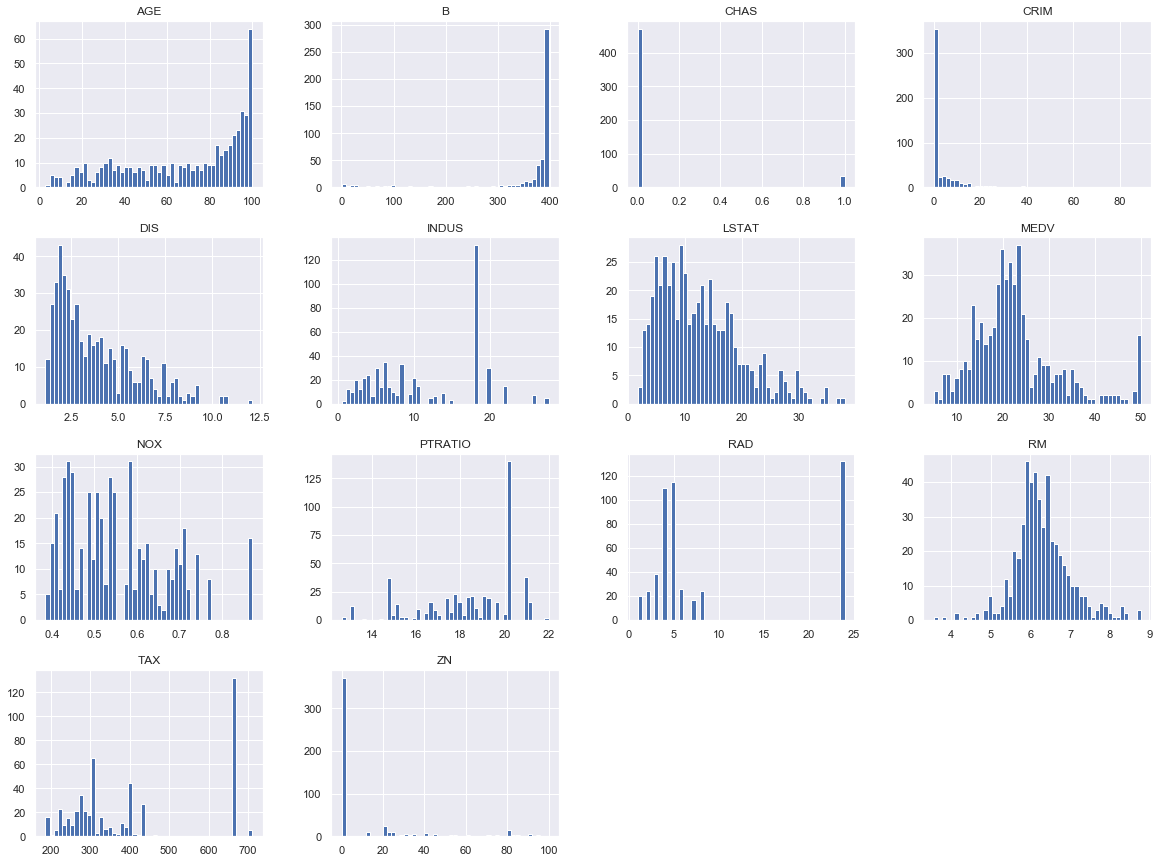

In [206]:
housing.hist(bins=50, figsize = (20,15))

## Train- Test Splitting

In [207]:
#for understanding Train_test_split
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [208]:
train_set, test_set = split_train_test(housing,0.2)

In [209]:
print(len(train_set))
print(len(test_set))

405
101


from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size = 0.2,random_state = 42)

In [210]:
print(len(train_set))
print(len(test_set))

405
101


In [211]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [212]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [213]:
housing = strat_train_set.copy()

## Looking for Correlations

In [214]:
corr_matrix = housing.corr()

In [215]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80cf2d2310>,
      dtype=object)

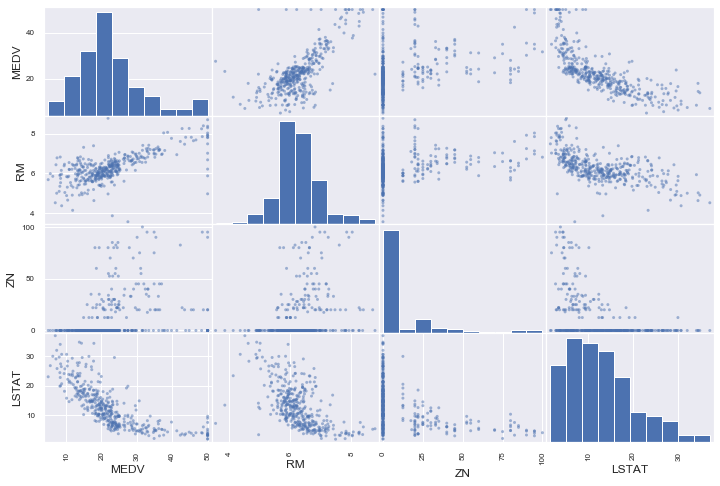

In [216]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


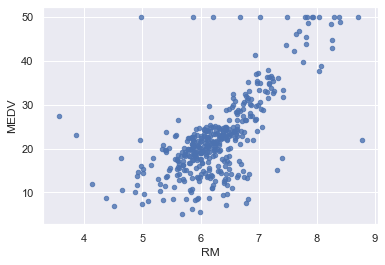

In [217]:
housing.plot(kind = 'scatter', x = 'RM', y = 'MEDV', alpha = 0.8)

## Trying Atribute Combination

In [218]:
housing['TAXRM'] = housing["TAX"]/housing['RM']

In [219]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [220]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


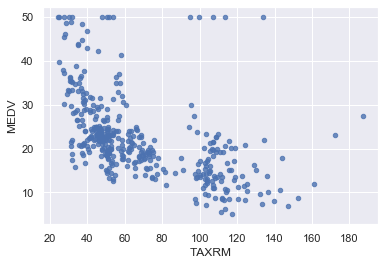

In [221]:
housing.plot(kind = 'scatter', x = 'TAXRM', y = 'MEDV', alpha = 0.8)

## There are no Missing attributes


In [222]:
housing.shape

(404, 15)

In [223]:
housing = strat_train_set.drop('MEDV', axis = 1)
housing_labels = strat_train_set['MEDV'].copy()

## SKlearn Design


### Create a pipeline

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler',StandardScaler()),
])

In [225]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [226]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [227]:
housing_num_tr.shape

(404, 13)

### Select a desired model for Real Estate estimation

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [229]:
some_data = housing.iloc[:5]

In [230]:
some_labels = housing_labels.iloc[:5]

In [231]:
prepared_data = my_pipeline.transform(some_data)

In [232]:
model.predict(prepared_data)

array([22.476, 25.49 , 16.311, 23.476, 23.457])

In [233]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [234]:
#Evaluating Model
from sklearn.metrics import mean_squared_error
housing_predict = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predict)
rmse = np.sqrt(mse)

In [235]:
rmse

1.1662031850461907

### Using Evaluation Technique - Cross Validation

In [236]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [237]:
rmse_scores

array([2.79012488, 3.61341789, 3.18766977, 4.19439413, 3.20898972])

In [238]:
def print_scores(scores):
    print("Scores :",scores)
    print("Mean :",scores.mean())
    print("Standard deviation :",scores.std())

In [239]:
print_scores(rmse_scores)

Scores : [2.79012488 3.61341789 3.18766977 4.19439413 3.20898972]
Mean : 3.398919278586791
Standard deviation : 0.475419834666427


## Saving the Model

In [240]:
from joblib import dump, load
dump(model,'RealEstate.joblib')

['RealEstate.joblib']

## Testing the Model on Test data

In [241]:
X_test = strat_test_set.drop("MEDV",axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

In [242]:
final_rmse

2.9093392872326325

In [243]:
#print(final_prediction,list(Y_test))

[24.757 11.583 25.46  22.07  18.263 15.042 19.8   14.524 31.232 40.266
 19.738 11.671 24.205 28.959 19.614 10.562 31.901 14.488 23.632 18.896
 19.833 18.203 16.682 22.028 18.14  30.786 16.261 32.697  8.777 33.493
 23.955 21.336 22.874 10.97  21.    11.065 42.745 24.387 23.045 41.31
 24.024 29.47  20.703 20.975 19.452 33.635 44.304 20.2   20.457 21.699
 21.342 14.742 21.28  15.037 24.902 32.518 42.37  28.44  19.502 20.928
 47.557 10.027 18.763 24.344 14.754 32.829 19.391 18.029 19.093 34.247
 27.139 22.791 21.518 22.052 34.979 12.79  15.922 20.018 20.797 21.513
 22.267 21.452 14.026 22.727 20.829 21.078 13.848 21.414 21.346 23.507
 18.979 27.272  7.274 26.082 18.908 30.011 19.759 31.127 14.643 26.428
 21.035 20.208] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [244]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])